<a href="https://colab.research.google.com/github/Wertymuna/deteksi_bentuk/blob/main/Deteksi_bentuk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Ca34pture.PNG to Ca34pture.PNG
User uploaded file "Ca34pture.PNG" with length 141338 bytes


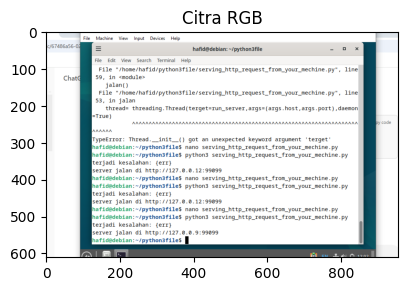

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


In [1]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import numpy as np

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Simpan path file
file_path = '/content/' + list(uploaded.keys())[0]  # Asumsikan hanya mengunggah satu file

# Baca gambar
img_path = '/content/' + list(uploaded.keys())[0]
img_rgb = cv2.imread(img_path)

# Tampilkan Gambar
plt.figure(figsize=(10,5))
plt.subplot(1,2,1),plt.imshow(img_rgb[:,:,::-1]),plt.title('Citra RGB')
plt.show()


#--------

# Ubah ke grayscale
gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Blurring
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Thresholding
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

# Mencari kontur
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Iterasi setiap kontur
for c in cnts:
    # Menghitung perkiraan bentuk
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    # Klasifikasi bentuk berdasarkan jumlah sudut
    if len(approx) == 3:
        shape = "segitiga"
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        shape = "persegi" if ar >= 0.95 and ar <= 1.05 else "persegipanjang"
    else:
        shape = "lingkaran"

    # Menggambar kontur dan label
    cv2.drawContours(img_rgb, [c], -1, (0, 255, 0), 2)
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(img_rgb, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
        0.5, (255, 255, 255), 2)

# Menampilkan gambar hasil
cv2.imshow("Gambar", img_rgb)
cv2.waitKey(0)